<a href="https://colab.research.google.com/github/laerteluizf/Proc_Imagens_2025_2/blob/main/Proc_Imagens_3_Tarefa_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow

In [ ]:
def aplicar_sal_pimenta(imagem, tamanho_kernel):

  # Verifica a imagem e se o kernel é ímpar
  if imagem is None:
      print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
      return
  if tamanho_kernel % 2 == 0:
      print("Erro: O do kernel deve ser um número ímpar (ex: 3, 5, 7).")
      return

  # Filtro da média
  media = cv2.blur(imagem, (tamanho_kernel,tamanho_kernel))

  mediana = cv2.medianBlur(imagem, tamanho_kernel)


  # Mostrar os resultados
  plt.figure(figsize=(15,5))

  plt.subplot(1,3,1)
  plt.imshow(imagem, cmap='gray')
  plt.title("Original")
  plt.axis('off')

  plt.subplot(1,3,2)
  plt.imshow(media, cmap='gray')
  plt.title(f'Media (Kernel {tamanho_kernel}x{tamanho_kernel})')
  plt.axis('off')

  plt.subplot(1,3,3)
  plt.imshow(mediana, cmap='gray')
  plt.title(f'Mediana (Kernel {tamanho_kernel}x{tamanho_kernel})')
  plt.axis('off')

  plt.tight_layout()
  plt.show()




In [12]:
def agucamento_laplaciano(imagem, tamanho_kernel):

  #imagem_borrada = cv2.GaussianBlur(imagem, (tamanho_kernel,tamanho_kernel), 0)
  imagem_borrada = cv2.medianBlur(imagem, tamanho_kernel)


  #Aplicar filtro Laplaciano sem ajuste
  laplaciano = cv2.Laplacian(imagem_borrada, cv2.CV_64F)

  #Ajuste do Laplaciano para exibição (normalização)
  laplaciano_ajustado = cv2.convertScaleAbs(laplaciano)

  #Aguçamento usando máscara do Laplaciano original
  imagem_borrada_float = imagem_borrada.astype(np.float64)
  imagem_aguçada_original = cv2.add(imagem_borrada_float, laplaciano)


  #Aguçamento usando máscara ajustada
  imagem_aguçada_ajustada = cv2.add(imagem_borrada, laplaciano_ajustado)

  # Exibir resultados
  plt.figure(figsize=(15,10))

  plt.subplot(2,3,1)
  plt.imshow(imagem, cmap='gray')
  plt.title("Original")
  plt.axis('off')

  plt.subplot(2,3,2)
  plt.imshow(imagem_borrada, cmap='gray')
  plt.title("(a) Borrada")
  plt.axis('off')

  plt.subplot(2,3,3)
  plt.imshow(laplaciano, cmap='gray')
  plt.title("(b) Laplaciano sem ajuste")
  plt.axis('off')

  plt.subplot(2,3,4)
  plt.imshow(laplaciano_ajustado, cmap='gray')
  plt.title("(c) Laplaciano com ajuste")
  plt.axis('off')

  plt.subplot(2,3,5)
  plt.imshow(imagem_aguçada_original, cmap='gray')
  plt.title("(d) Aguçada máscara original")
  plt.axis('off')

  plt.subplot(2,3,6)
  plt.imshow(imagem_aguçada_ajustada, cmap='gray')
  plt.title("(e) Aguçada máscara ajustada")
  plt.axis('off')

  plt.show()



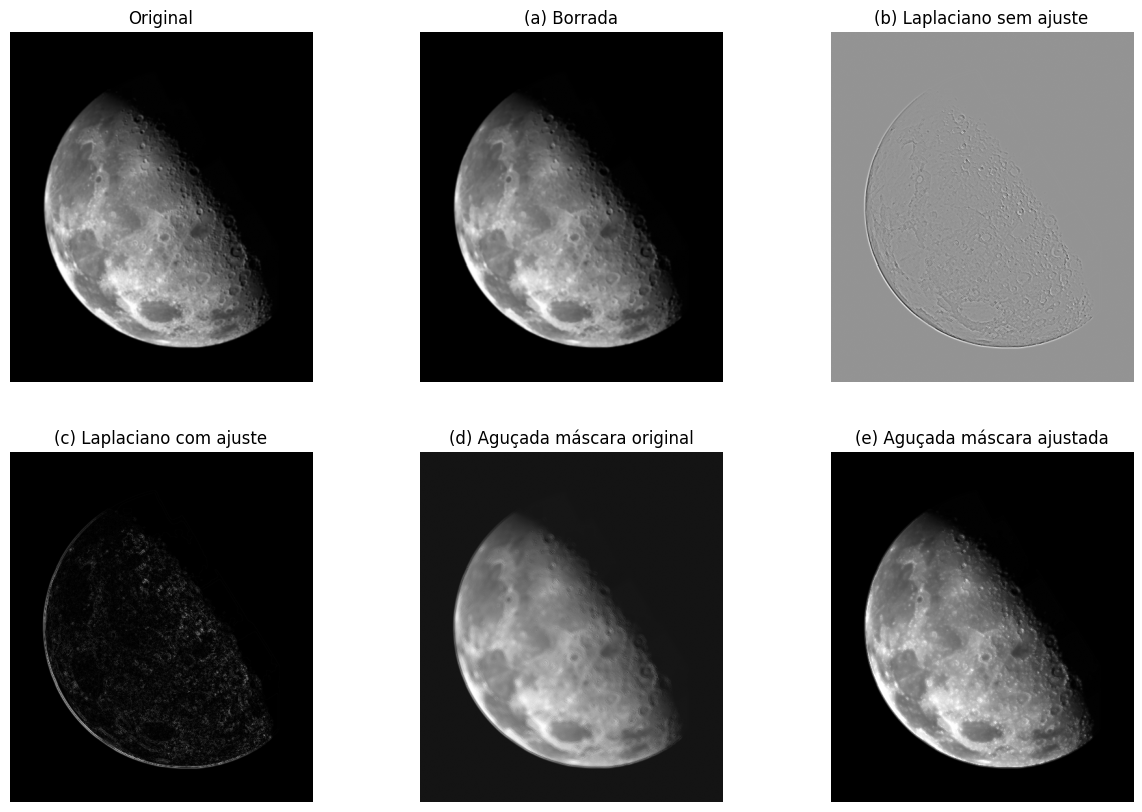

In [13]:
# --- Execução do programa ---

caminho_imgagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Atividade 6/FIG033~4.TIF'

imagem_ori = cv2.imread(caminho_imgagem, cv2.COLOR_BGR2GRAY)

tamanho_kernel = 3

agucamento_laplaciano(imagem_ori, tamanho_kernel)
